In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=651f6d6b6c64a8364047541b92d4bb08


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
        
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ledyard
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | jinchang
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | margate
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | roswell
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | polunochnoye
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | najran
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | semey
Processing Record 21 of Set 1 | tateyama
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | saint-phili

Processing Record 38 of Set 4 | faya
Processing Record 39 of Set 4 | felanitx
Processing Record 40 of Set 4 | camopi
Processing Record 41 of Set 4 | longlac
City not found. Skipping...
Processing Record 42 of Set 4 | mogoytuy
Processing Record 43 of Set 4 | berlin
Processing Record 44 of Set 4 | mocambique
City not found. Skipping...
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | jijiga
Processing Record 48 of Set 4 | jumla
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | mahon
Processing Record 1 of Set 5 | japura
Processing Record 2 of Set 5 | bossembele
City not found. Skipping...
Processing Record 3 of Set 5 | haukipudas
Processing Record 4 of Set 5 | fairbanks
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | bambous virieux
Processing Record 7 of Set 5 | grindavik
Processing Record 8 of Set 5 | lompoc
Processing Record 9 of Set 5 | santarem
Processi

Processing Record 28 of Set 8 | garden city
Processing Record 29 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 30 of Set 8 | tosya
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | shubarshi
Processing Record 33 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | san miguelito
Processing Record 35 of Set 8 | ribeira grande
Processing Record 36 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 37 of Set 8 | mariental
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | hirara
Processing Record 40 of Set 8 | praxedis guerrero
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | moranbah
Processing Record 43 of Set 8 | sataua
City not found. Skipping...
Processing Record 44 of Set 8 | awjilah
Processing Record 45 of Set 8 | kiama
Processing Record 46 of Set 8 | acapulco
Processing Record 47 of Set 8 | porto novo
Processing Record 48 of S

Processing Record 12 of Set 12 | esso
Processing Record 13 of Set 12 | estelle
Processing Record 14 of Set 12 | san mateo del mar
Processing Record 15 of Set 12 | grand centre
City not found. Skipping...
Processing Record 16 of Set 12 | sungairaya
Processing Record 17 of Set 12 | axim
Processing Record 18 of Set 12 | darab
Processing Record 19 of Set 12 | nelson bay
Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | wodonga
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | samarai
Processing Record 25 of Set 12 | mabaruma
Processing Record 26 of Set 12 | igrim
Processing Record 27 of Set 12 | amapa
Processing Record 28 of Set 12 | saint-francois
Processing Record 29 of Set 12 | dunmore town
Processing Record 30 of Set 12 | sibolga
Processing Record 31 of Set 12 | sobolevo
Processing Record 32 of Set 12 | ankang
Processing Record 33 of Set 12 | danane
Processing Record 34 of Set 12 | labutta
Ci

In [8]:
city_data.len()

AttributeError: 'list' object has no attribute 'len'

In [9]:
len(city_data)

551

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,53.28,93,100,7.11,ZA,2022-10-03 02:13:22
1,Ledyard,41.4398,-72.0142,52.72,64,0,16.11,US,2022-10-03 02:13:23
2,Korla,41.7597,86.1469,48.72,22,0,15.14,CN,2022-10-03 02:13:23
3,Ilulissat,69.2167,-51.1000,32.02,86,100,1.14,GL,2022-10-03 02:13:24
4,Kaitangata,-46.2817,169.8464,51.60,49,57,15.86,NZ,2022-10-03 02:13:24
5,Jinchang,38.4953,102.1739,45.86,26,100,4.03,CN,2022-10-03 02:13:24
6,Tuatapere,-46.1333,167.6833,50.20,57,81,13.20,NZ,2022-10-03 02:13:25
7,Margate,51.3813,1.3862,49.89,67,99,3.33,GB,2022-10-03 02:12:21
8,Victoria,22.2855,114.1577,88.97,79,43,5.99,HK,2022-10-03 02:13:25
9,Mount Gambier,-37.8333,140.7667,66.20,53,69,3.42,AU,2022-10-03 02:10:20


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-10-03 02:13:22,-34.5322,20.0403,53.28,93,100,7.11
1,Ledyard,US,2022-10-03 02:13:23,41.4398,-72.0142,52.72,64,0,16.11
2,Korla,CN,2022-10-03 02:13:23,41.7597,86.1469,48.72,22,0,15.14
3,Ilulissat,GL,2022-10-03 02:13:24,69.2167,-51.1000,32.02,86,100,1.14
4,Kaitangata,NZ,2022-10-03 02:13:24,-46.2817,169.8464,51.60,49,57,15.86


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664764693.4049926

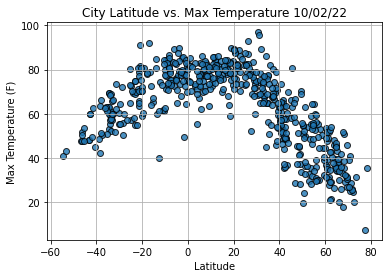

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

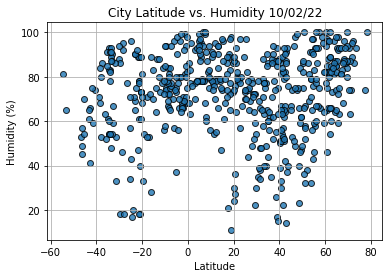

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

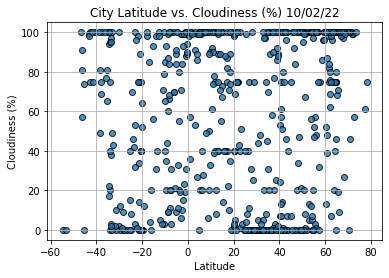

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

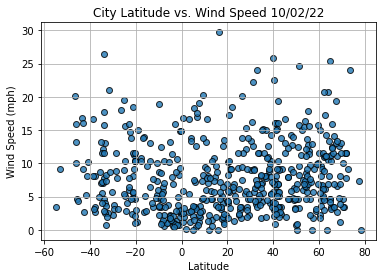

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

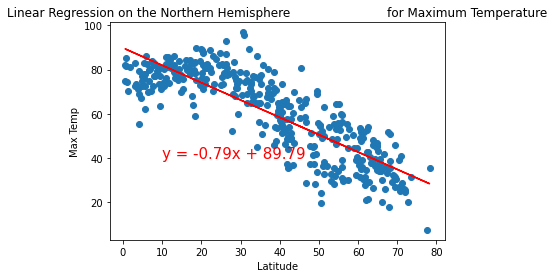

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

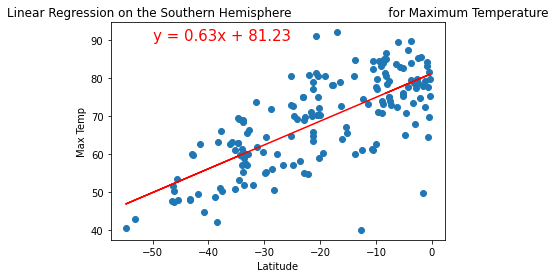

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

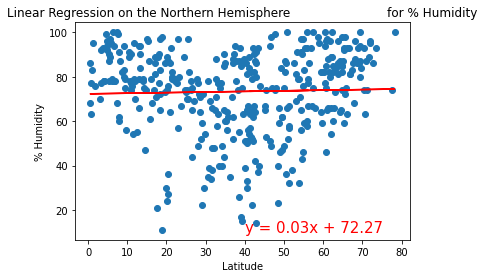

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

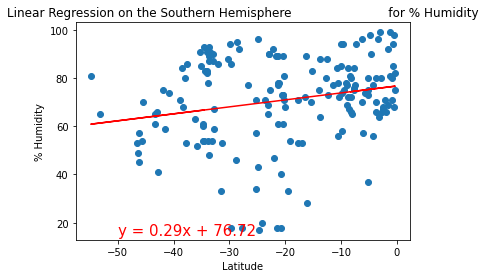

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

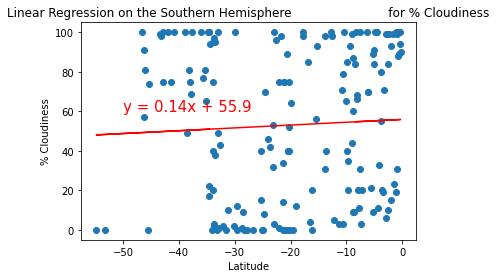

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

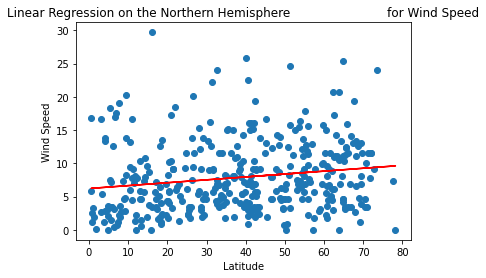

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

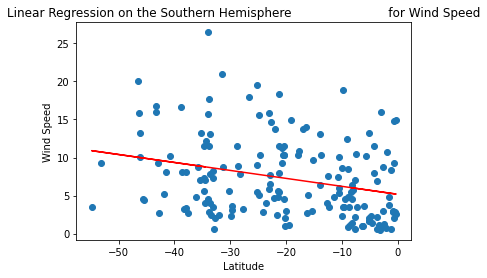

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))